#A Reinforcement-Learning approach to swing trading

This is a placeholder for our Group to work together to develop the GitHub documentation related to our Capstone Project related Medium-Long Term Trading Model that a combination of handling Market Regime Shifts and taken it into an opportunities for Swing Trading to exploit the market during the market shift.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
import os


In [ ]:

# ----------------------
# Configuration
# ----------------------
# Index tickers
index_tickers = [
    '^GSPC',        # S&P 500
    '^JKSE',        # Jakarta Composite Index
    '^JKLQ45',      # IDX LQ45
    'GC=F',         # Gold

]

# Stock tickers
stock_tickers = [
    'BBRI.JK', 'BMRI.JK', 'BBCA.JK', 'BNGA.JK',
    'JSMR.JK', 'TLKM.JK'
]

start_date = '2004-01-01'
end_date = '2025-07-31'

In [ ]:
# Directory setup
BASE_DIR = "/content/SwingTrading-RegimeRL"
RAW_DIR = os.path.join(BASE_DIR, "data/raw")
PROC_DIR = os.path.join(BASE_DIR, "data/processed")
os.makedirs(RAW_DIR, exist_ok=True)
os.makedirs(PROC_DIR, exist_ok=True)

def download_and_save(tickers, category):
    print(f"\nDownloading {category} data...")
    df = yf.download(
        tickers,
        start=start_date,
        end=end_date,
        auto_adjust=False,
        actions=False,
        progress=False
    )['Adj Close']

    # Fill missing prices due to different market calendars
    df = df.ffill().dropna(how="all")

    # Save prices
    df.to_csv(os.path.join(RAW_DIR, f"{category}_adj_close.csv"))

    # Calculate returns without triggering FutureWarning
    returns = df.pct_change(fill_method=None).dropna()
    returns.to_csv(os.path.join(PROC_DIR, f"{category}_daily_returns.csv"))

    return df, returns

In [ ]:
# ----------------------
# Download Index Data
# ----------------------
index_data, index_returns = download_and_save(index_tickers, "index")

In [ ]:
index_data

Ticker,GC=F,^GSPC,^JKLQ45,^JKSE
Date,,,,
2004-01-02,NaN,1108.479980,155.500000,704.470520
2004-01-05,424.399994,1122.219971,161.020004,725.443787
2004-01-06,422.799988,1123.670044,161.330002,723.960815
2004-01-07,421.899994,1126.329956,157.259995,709.339417
2004-01-08,424.000000,1131.920044,161.940002,730.786499
...,...,...,...,...
2025-07-24,3371.000000,6363.350098,799.799988,7530.901855
2025-07-25,3334.000000,6388.640137,794.510010,7543.502930
2025-07-28,3309.100098,6389.770020,803.219971,7614.768066


In [ ]:
# ----------------------
# Download Stock Data
# ----------------------
stock_data, stock_returns = download_and_save(stock_tickers, "stocks")


<Figure size 1400x700 with 0 Axes>

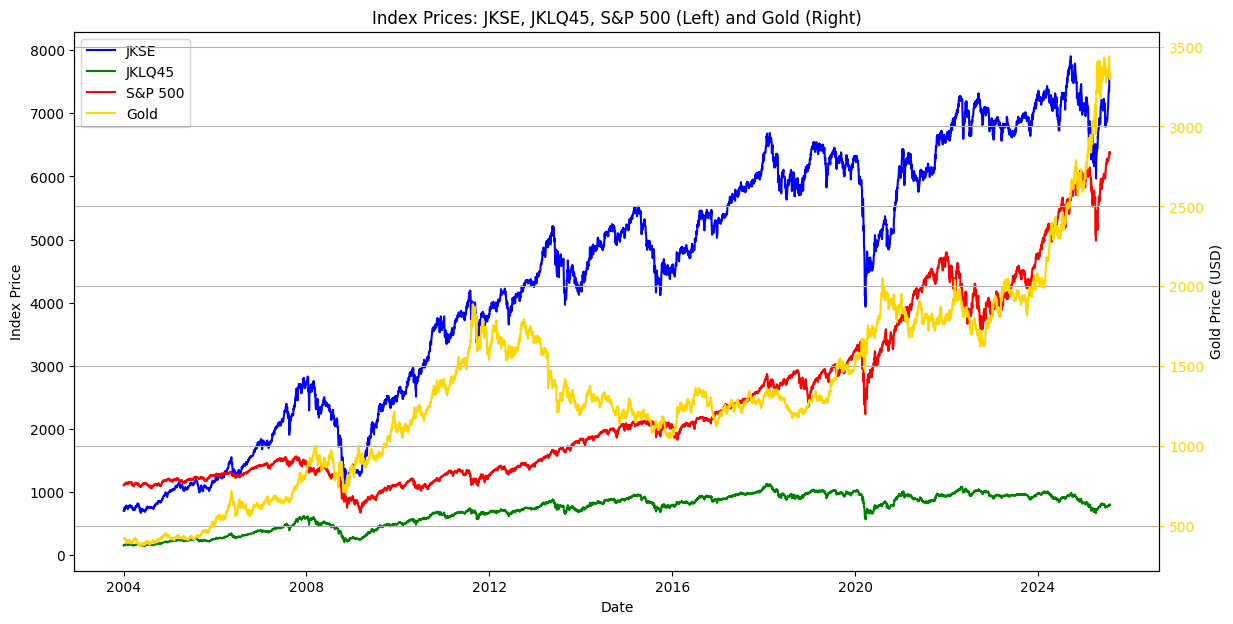

In [ ]:
# ----------------------
# Plot: Index Prices with Dual Axis for Gold
# ----------------------
plt.figure(figsize=(14, 7))

# Primary axis: JKSE, JKLQ45, GSPC
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.plot(index_data.index, index_data['^JKSE'], label='JKSE', color='blue')
ax1.plot(index_data.index, index_data['^JKLQ45'], label='JKLQ45', color='green')
ax1.plot(index_data.index, index_data['^GSPC'], label='S&P 500', color='red')
ax1.set_xlabel('Date')
ax1.set_ylabel('Index Price')
ax1.tick_params(axis='y')

# Secondary axis: Gold
ax2 = ax1.twinx()
ax2.plot(index_data.index, index_data['GC=F'], label='Gold', color='gold')
ax2.set_ylabel('Gold Price (USD)')
ax2.tick_params(axis='y', colors='gold')

# Legends
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper left')

plt.title("Index Prices: JKSE, JKLQ45, S&P 500 (Left) and Gold (Right)")
plt.grid(True)
plt.show()

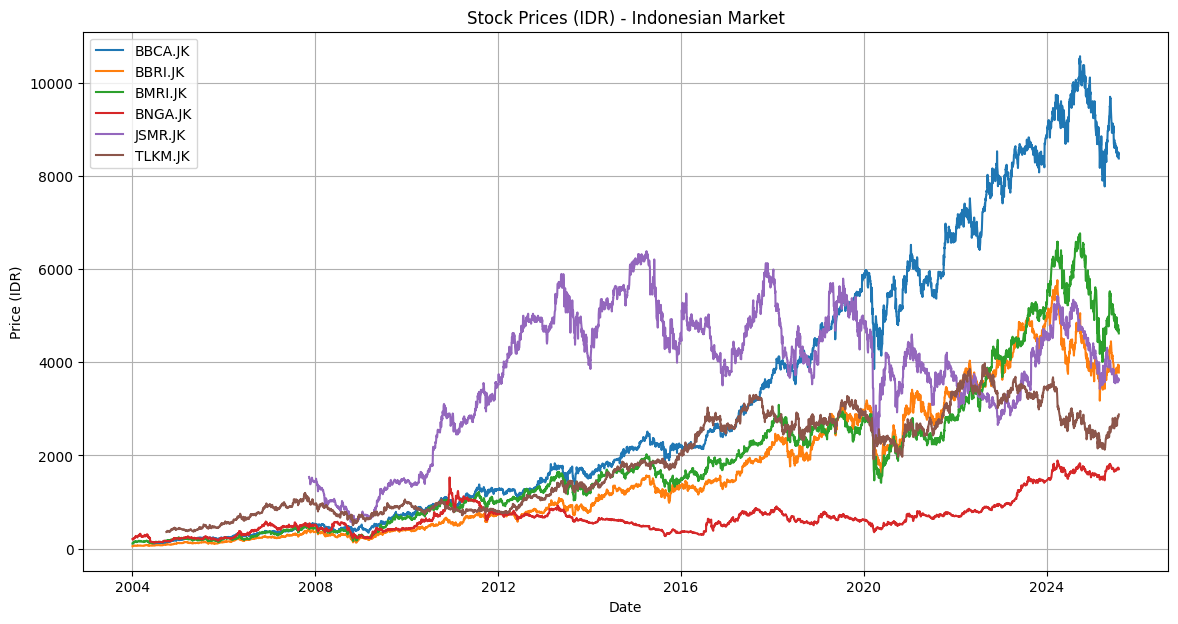

In [ ]:
# ----------------------
# Plot: Stock Prices (Absolute)
# ----------------------
plt.figure(figsize=(14, 7))
for ticker in stock_data.columns:
    plt.plot(stock_data.index, stock_data[ticker], label=ticker)

plt.title("Stock Prices (IDR) - Indonesian Market")
plt.xlabel("Date")
plt.ylabel("Price (IDR)")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()

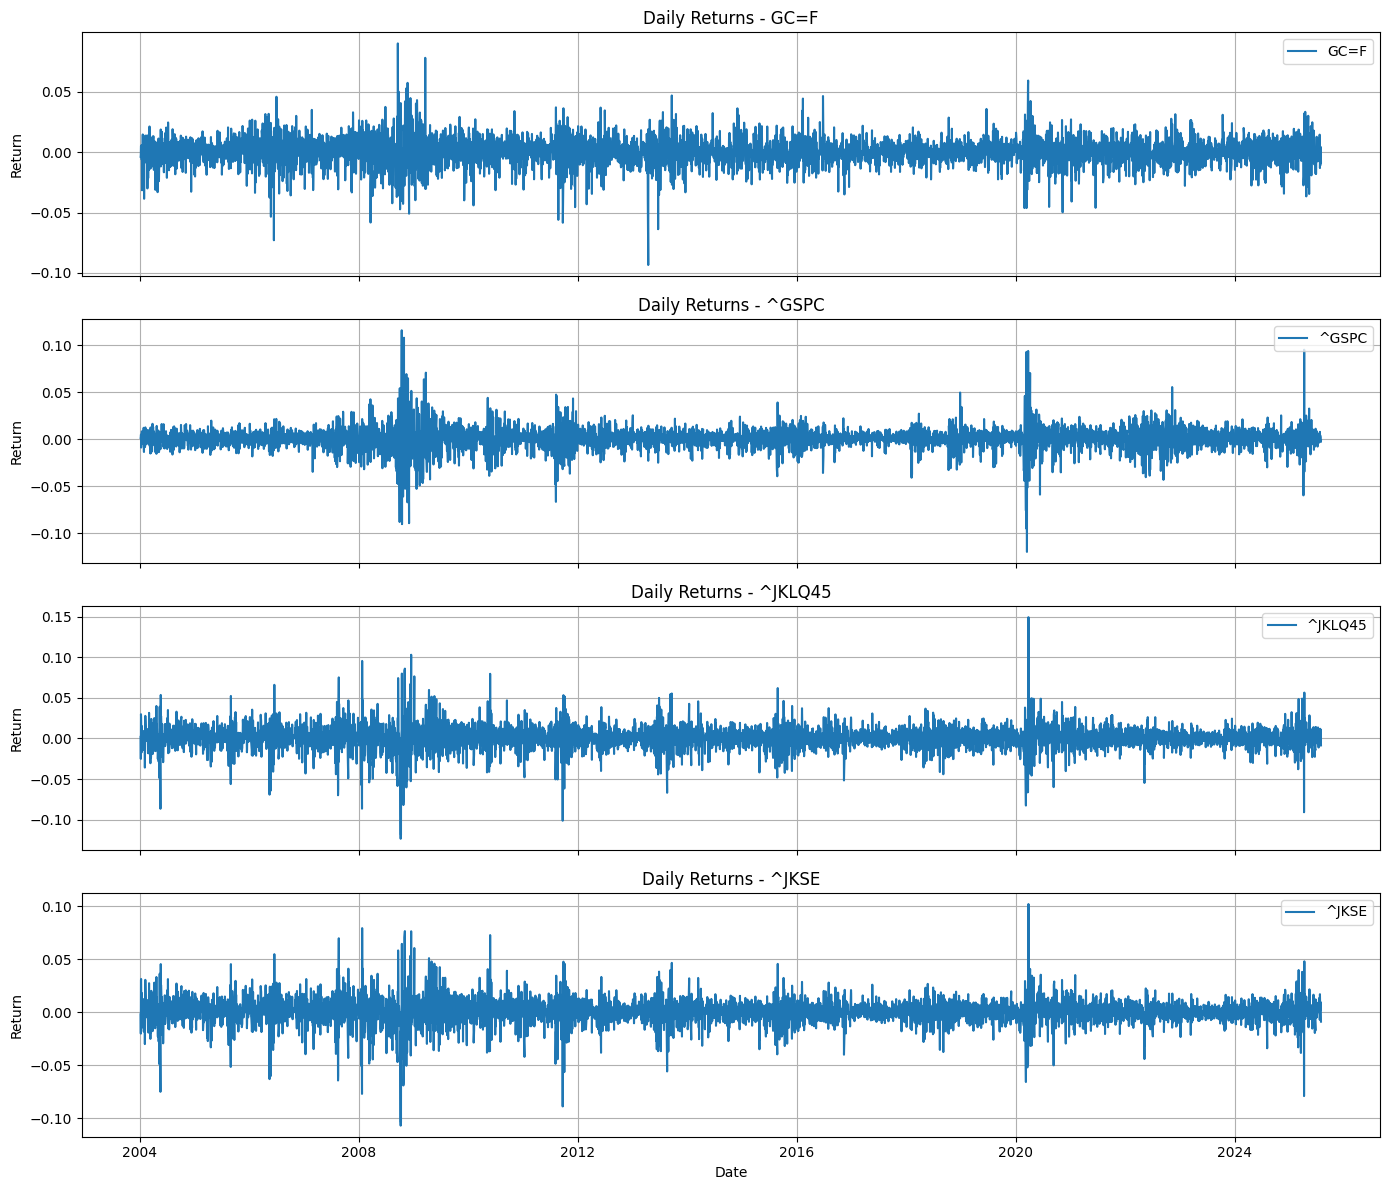

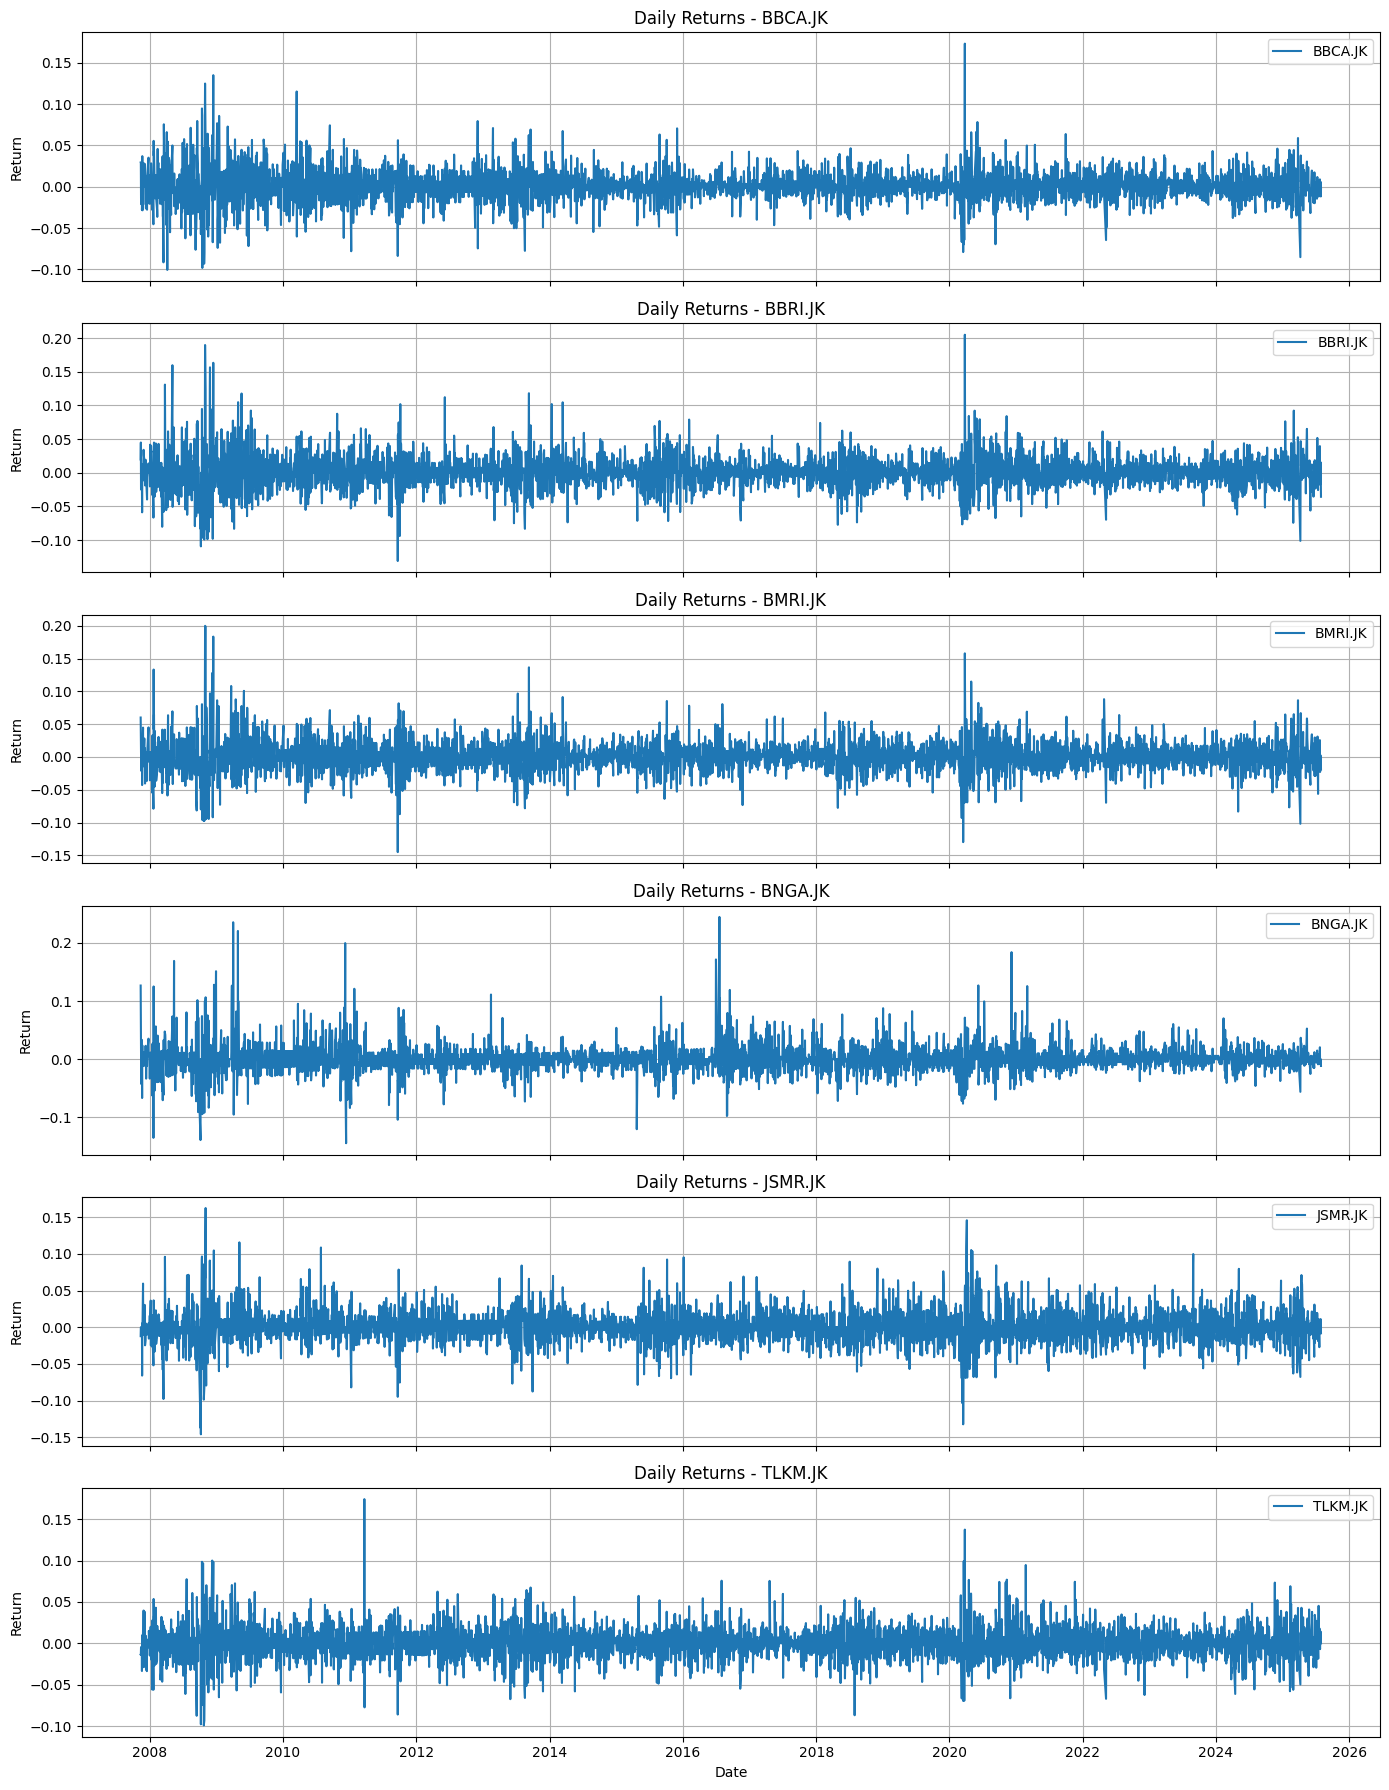

In [ ]:
# ----------------------
# Plot: Daily Returns - Index (Separate Subplots)
# ----------------------
fig, axes = plt.subplots(len(index_returns.columns), 1, figsize=(14, 3 * len(index_returns.columns)), sharex=True)

for i, ticker in enumerate(index_returns.columns):
    axes[i].plot(index_returns.index, index_returns[ticker], label=ticker)
    axes[i].set_title(f"Daily Returns - {ticker}")
    axes[i].set_ylabel("Return")
    axes[i].grid(True)
    axes[i].legend(loc="upper right")

plt.xlabel("Date")
plt.tight_layout()
plt.show()

# ----------------------
# Plot: Daily Returns - Stocks (Separate Subplots)
# ----------------------
fig, axes = plt.subplots(len(stock_returns.columns), 1, figsize=(14, 3 * len(stock_returns.columns)), sharex=True)

for i, ticker in enumerate(stock_returns.columns):
    axes[i].plot(stock_returns.index, stock_returns[ticker], label=ticker)
    axes[i].set_title(f"Daily Returns - {ticker}")
    axes[i].set_ylabel("Return")
    axes[i].grid(True)
    axes[i].legend(loc="upper right")

plt.xlabel("Date")
plt.tight_layout()
plt.show()


In [ ]:
print(f"✅ Data preparation completed.\nSaved to:\n- {RAW_DIR}\n- {PROC_DIR}")

✅ Data preparation completed.
Saved to:
- /content/SwingTrading-RegimeRL/data/raw
- /content/SwingTrading-RegimeRL/data/processed
